In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Science/dataset/marketing_campaign.csv", sep='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [102]:
#Change martial status to single(0) or in a relationship(1)
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [103]:
d = {'Widow': 'Separated', 'Divorced': 'Separated', 'Alone': 'Single', 'Absurd':'Separated', 'YOLO':'Separated' }
df['Marital_Status'] = df['Marital_Status'].map(d).fillna(df['Marital_Status'])

In [104]:
df['Marital_Status'].value_counts()

Married      864
Together     580
Single       483
Separated    313
Name: Marital_Status, dtype: int64

In [105]:
d = {'Separated': 0 , 'Married': 1, 'Single' : 0, 'Together' : 1}
df['Marital_Status'] = df['Marital_Status'].map(d).fillna(df['Marital_Status'])

In [106]:
df['Marital_Status'].value_counts()

1    1444
0     796
Name: Marital_Status, dtype: int64

In [107]:
#Change education to low(0), normal(1) and high(2)
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [108]:
d = {'Graduation': 1 , 'PhD': 2, 'Master' : 2, '2n Cycle' : 0, 'Basic':0}
df['Education'] = df['Education'].map(d).fillna(df['Education'])

In [109]:
df['Education'].value_counts()

1    1127
2     856
0     257
Name: Education, dtype: int64

In [110]:
#Change birth year to Silent G(0), Baby boomers(1), Gen X(2) and millenials(3)
df['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [111]:
df.loc[df['Year_Birth'] <= 1945, 'Year_Birth'] = 0
df.loc[((df['Year_Birth'] > 1945) & (df['Year_Birth'] <= 1964)), 'Year_Birth'] = 1
df.loc[((df['Year_Birth'] > 1964) & (df['Year_Birth'] <= 1976)), 'Year_Birth'] = 2
df.loc[df['Year_Birth'] >= 1977, 'Year_Birth'] = 3

In [115]:
df['Year_Birth'].value_counts()

2    848
1    759
3    606
0     27
Name: Year_Birth, dtype: int64

In [116]:
#Use forward fill to fill null values
df = df.fillna(method='ffill')

In [117]:
#Create a column of the year the customer joined the company
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [118]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1,1,0,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1,1,0,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,2,1,1,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,3,1,1,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,3,2,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [119]:
from datetime import date
df['year_joined'] = pd.DatetimeIndex(df['Dt_Customer']).year
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year_joined
0,5524,1,1,0,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012
1,2174,1,1,0,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014
2,4141,2,1,1,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013
3,6182,3,1,1,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014
4,5324,3,2,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014


In [120]:
df = df.drop(['Dt_Customer'],axis=1)

In [121]:
#Change the date joined old(0), middle(1), new(2)
df['year_joined'].describe()

count    2240.000000
mean     2013.028125
std         0.684554
min      2012.000000
25%      2013.000000
50%      2013.000000
75%      2013.000000
max      2014.000000
Name: year_joined, dtype: float64

In [122]:
df['year_joined'].value_counts()

2013    1189
2014     557
2012     494
Name: year_joined, dtype: int64

In [123]:
d = {2012: 0 , 2013: 1, 2014 : 2}
df['year_joined'] = df['year_joined'].map(d).fillna(df['year_joined'])

In [124]:
df['year_joined'].value_counts()

1    1189
2     557
0     494
Name: year_joined, dtype: int64

In [126]:
#Scale the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
sig_num_col = ['Income', 'Recency','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']
df[sig_num_col] = scaler.fit_transform(df[sig_num_col])

In [133]:
#Use PCA to reduce dimension of the data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df)

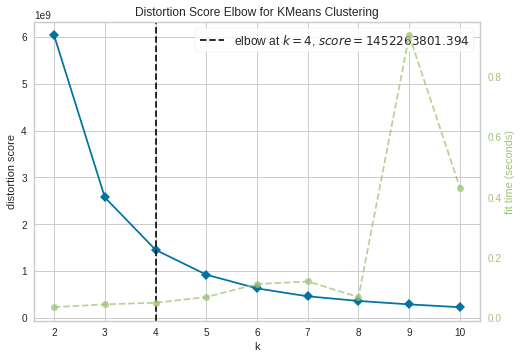

In [134]:
#Use elbow method to obtain optimal number of clusters for kmeans
#Same thing with pca
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans(), k=10)
model.fit(pca_df)
model.show()

In [135]:
#Fit the model and compute the silhouette score
model = KMeans(n_clusters=4)
model.fit(pca_df)
from sklearn.metrics import silhouette_score
# silhouette score
print(silhouette_score(pca_df, model.labels_, metric='euclidean')) 

0.575642870391078


In [130]:
#map the clusters back to the original dataset
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Science/dataset/marketing_campaign.csv", sep='\t')
data = data.drop(['ID'],axis=1)

In [136]:
pred = model.predict(pca_df)
clustered_data = pd.DataFrame(data)
clustered_data['cluster'] = pred
clustered_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,3
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0


In [137]:
clustered_data['cluster'].value_counts()

0    594
1    560
2    551
3    535
Name: cluster, dtype: int64

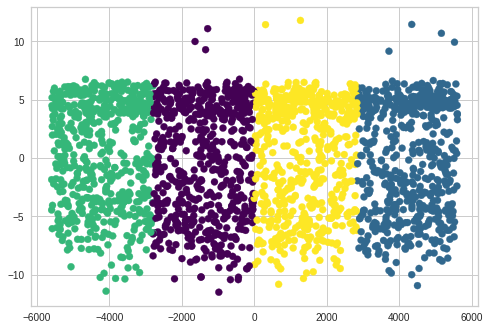

In [141]:
#Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=pred, cmap='viridis')

In [143]:
#Save new dataframe to a csv dataset that will be used to perform data analysis
clustered_data.to_csv("/content/drive/My Drive/Colab Notebooks/Data Science/dataset/marketing_campaign_clustered.csv", index=False)